In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,svm
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score 
style.use("ggplot")


In [6]:
#displaying the data information
iris = datasets.load_iris()
X=pd.DataFrame(data=iris.data,columns=['sepal length','sepal width','petal length','petal width'])
y=pd.DataFrame(data=iris.target,columns=['label'])
df=pd.concat([X,y],axis=1)
display(df.head())
display(df.columns)
display(df.info())
display(df.describe())

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
label           150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


None

,sepal length,sepal width,petal length,petal width,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2] # we only take the first two features

# avoid this ugly slicing by using a two-dim dataset
y = iris.target

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

#calling the svm classifier and fit the data
svc = svm.SVC(kernel='rbf', gamma=10,C=10,degree=4,random_state=0).fit(X_train, y_train)


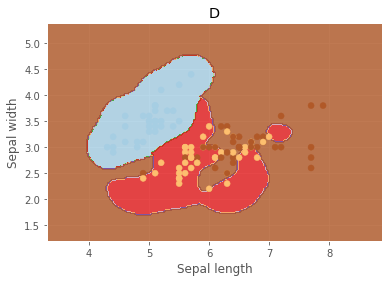

In [4]:
iris = datasets.load_iris()
X = X_train # we only take the first two features. We

# avoid this ugly slicing by using a two-dim dataset
y = y_train


def plotSVC(title):

# create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) #plot the base
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])#np.c  ->  concat along the second axis  ravel -> coby
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)#to Distinguish the classes
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)#putt the points
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()
plotSVC("D")

In [13]:
#estimating the accuracy
y_pred = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.868421052631579
